# Plotting with Pandas

## Resources

When you run the cell below, it will fetch a folder called data for you.


In [17]:
%%bash
set -euo pipefail

REPO_ZIP_URL="https://github.com/UCB-urban-data101/classActivity_data/archive/refs/heads/main.zip"
TMP_DIR="$(mktemp -d)"

# Prefer wget, otherwise curl
if command -v wget >/dev/null 2>&1; then
  wget -q -O "$TMP_DIR/repo.zip" "$REPO_ZIP_URL"
else
  curl -L -s -o "$TMP_DIR/repo.zip" "$REPO_ZIP_URL"
fi

unzip -oq "$TMP_DIR/repo.zip" -d "$TMP_DIR"
SRC_DIR="$TMP_DIR/classActivity_data-main"

rm -rf data
cp -R "$SRC_DIR/data" .

rm -rf "$TMP_DIR"
echo "Fetch complete."


Fetch complete.


## **1.Using Matplotlib**
**Matplotlib** is a Python library used to create visualizations such as line plots, bar charts, scatter plots, and more. It allows us to **turn data into graphs** for better understanding.

- We import `matplotlib.pyplot` as `plt`. It comes with simple functions for creating and customizing plots.
- We use another package called `seaborn` to enhance the visuals of our plots and make them more visually appealing
- Pandas **integrates with Matplotlib**, making it easy to plot directly from a DataFrame.

#### Creating a simple line chart


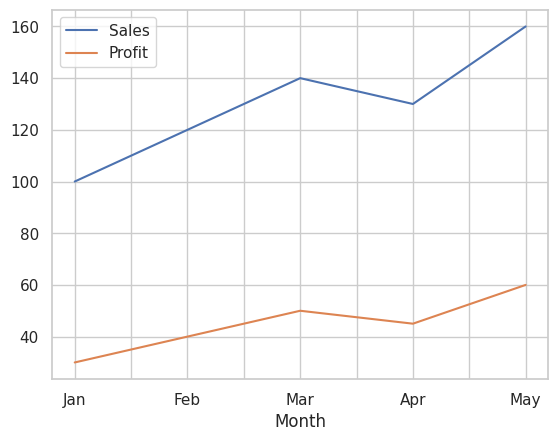

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],  # X-axis labels (time)
    'Sales': [100, 120, 140, 130, 160],  # Sales data
    'Profit': [30, 40, 50, 45, 60]  # Profit data
}).set_index('Month')

# Creating a basic line plot
df.plot(kind='line')

# Displaying the plot
plt.show()

#### **What happens here?**
- **Creates a DataFrame (`df`)** with three columns:
  - `'Month'`: Labels for the X-axis (January to May).
  - `'Sales'`: Sales values for each month.
  - `'Profit'`: Profit values for each month.
- **`.set_index('Month')`** makes `'Month'` the **index**, so it will automatically be used on the X-axis when plotting.

- **Plot the Data in the DataFrame**:
    - **Pandas automatically uses Matplotlib** when calling `.plot()`.
    - `df.plot(kind='line')` creates a **line plot** with `Month` on the X-axis and numerical values on the Y-axis.
    - `plt.show()` **displays the figure**.



This is a basic plot, lets see how we can make it better



### **1.1 `fig` and `ax` in Matplotlib**
Matplotlib is built around two key objects:

- **`fig` (Figure):** The **entire plotting area** (think of it as a blank canvas).
- **`ax` (Axes):** The **actual plot** drawn inside the figure.

Let's see them in action


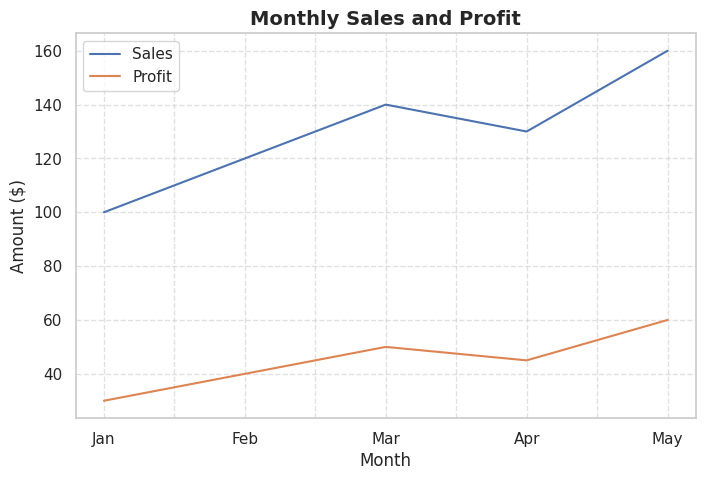

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))  # Create a figure and axis

df.plot(kind='line', ax=ax)  # Draw the plot inside 'ax'

ax.set_title('Monthly Sales and Profit', fontsize=14, fontweight='bold')  # Set a title
ax.set_ylabel('Amount ($)', fontsize=12)  # Label Y-axis
ax.grid(True, linestyle='--', alpha=0.6)  # Change the style of the grid to ---

plt.show()

#### **What happens here?**
- **`fig, ax = plt.subplots()`** explicitly creates a figure and an axis.
- **`ax` is passed to `df.plot()`**, ensuring better control over customization.
- `ax.set_title()`, `ax.set_ylabel()`, and `ax.grid()` **modify the plot appearance**.
    - `ax.set_title()` → Sets a title for the entire plot.
    - `ax.set_ylabel()` → Adds/customizes a label to the Y-axis.
        -   `Amount ($)` → Indicates that the values are in dollars.
        -   `fontsize=12` → Sets the font size.
    - `ax.set_xlabel()` → Adds/customizes a label to the X-axis. Settings are similar to `set_ylabel`


Using `fig` and `ax` is the **recommended approach** for multiple subplots or more advanced customization.

## **2. Enhancing Pandas Plots with Seaborn**
Pandas plots look fine, but **Seaborn** makes them look even better with minimal effort.
Seaborn is a **visualization library** built on Matplotlib that provides:
- **Prettier color schemes and grid styles**.
- **Easier handling of statistical plots**.
- **Automatic integration with Pandas DataFrames**.

By convention, we import `seaborn` as `sns`

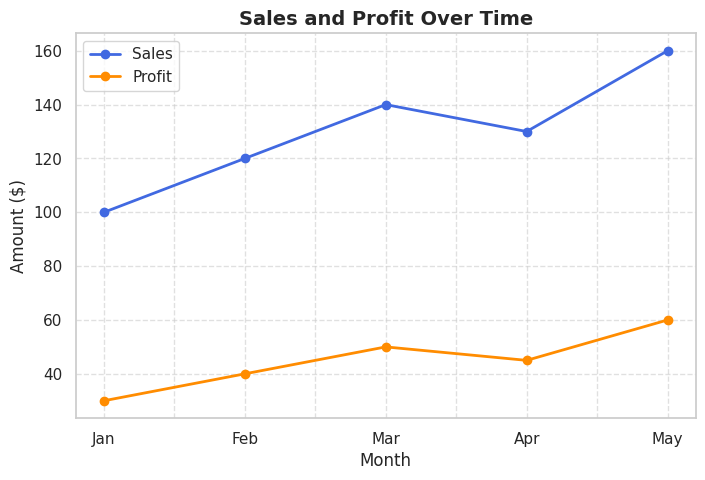

In [20]:
import seaborn as sns

sns.set_theme(style="whitegrid")  # Apply Seaborn styling

fig, ax = plt.subplots(figsize=(8, 5))

df.plot(kind='line', marker='o', linewidth=2, markersize=6, color=['royalblue', 'darkorange'], ax=ax)

ax.set_title('Sales and Profit Over Time', fontsize=14, fontweight='bold')
ax.set_ylabel('Amount ($)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()


### **What’s Different?**
- **`sns.set_theme(style="whitegrid")`** applies **Seaborn's clean grid styling**.
- **Better colors** are used: `royalblue` for sales and `darkorange` for profit.
- **Markers (`'o'`) (the dots you see for each (month, amoount) pair, and a thicker line (`linewidth=2`)** improve readability.

Seaborn **enhances readability**, making graphs look more professional.




Seaborn provides predefined themes that you can apply using `sns.set_theme()`. Here are some of the widely used themes:

- `darkgrid` – Grid with a dark background.
- `whitegrid` – Grid with a white background (good for reports).
- `dark` – Dark background with no grid.
- `white` – White background with no grid.
- `ticks` – Minimalist style with small axis ticks.

In [21]:

print(sns.axes_style())  # Check current style
# print(sns.plotting_context())  # Check current font/size settings

{'axes.facecolor': 'white', 'axes.edgecolor': '.8', 'axes.grid': True, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': '.8', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.15', 'ytick.color': '.15', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.round: 'round'>, 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'font.family': ['sans-serif'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'xtick.bottom': False, 'xtick.top': False, 'ytick.left': False, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}




#### Check the Official Seaborn Documentation
For a full list of styles and customization options, visit:
-  [Seaborn Aesthetic Functions](https://seaborn.pydata.org/tutorial/aesthetics.html)
-  [Seaborn Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)


#### Creating a Simple Bar Chart
Line plots work well for **continuous data**, but bar charts are better for **categorical comparisons**.


This code **creates a bar chart using Pandas and Matplotlib and Seaborn**. Let's go through each line and understand what happens.


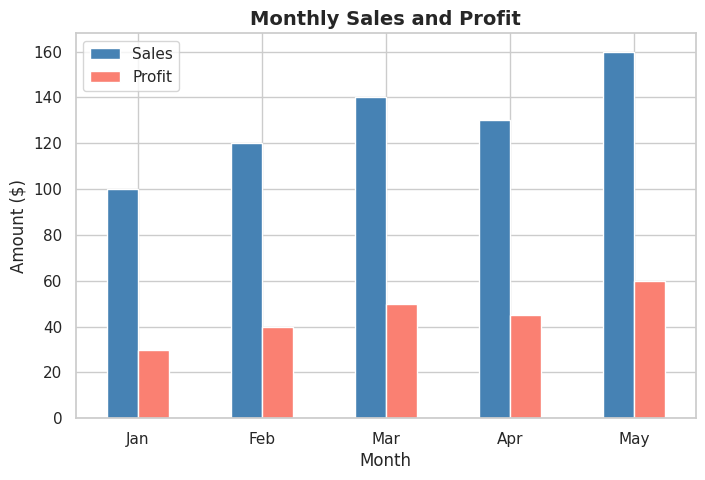

In [22]:

# Set Seaborn theme
sns.set_theme(style="whitegrid", palette="Set3")

# Sample DataFrame (wide-form, no aggregation)
df = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
    'Sales': [100, 120, 140, 130, 160],
    'Profit': [30, 40, 50, 45, 60]
}).set_index('Month')

# Create figure and axes
fig2, ax2 = plt.subplots(figsize=(8, 5))

# Use Seaborn barplot (NO aggregation, keep groups separate)
df.plot(kind='bar', ax=ax2, color=['steelblue', 'salmon'])

# Customize the plot
ax2.set_title('Monthly Sales and Profit', fontsize=14, fontweight='bold')
ax2.set_ylabel('Amount ($)', fontsize=12)
ax2.set_xlabel('Month', fontsize=12)

# Keep x-axis labels horizontal
plt.xticks(rotation=0)

# Show the plot
plt.show()


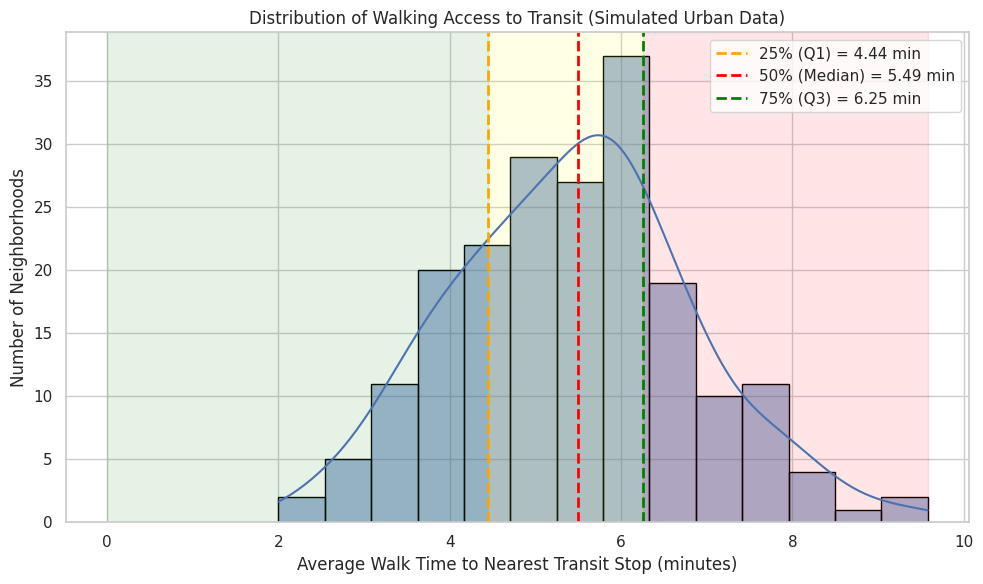

In [23]:
import numpy as np

# Simulated urban data: average walk time to nearest transit stop (in minutes)
# Based on distributions found in accessibility studies (e.g., SFCTA, Access Across America)
np.random.seed(42)
data = np.clip(np.random.normal(loc=5.5, scale=1.5, size=200), 2, 12)

df = pd.DataFrame({'walk_time_min': data})

# Calculate quartiles
q1 = df['walk_time_min'].quantile(0.25)
median = df['walk_time_min'].quantile(0.50)
q3 = df['walk_time_min'].quantile(0.75)

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['walk_time_min'], bins=14, kde=True, edgecolor='black', color="#4c72b0")

# Add quartile lines
plt.axvline(q1, color='orange', linestyle='--', linewidth=2, label=f'25% (Q1) = {q1:.2f} min')
plt.axvline(median, color='red', linestyle='--', linewidth=2, label=f'50% (Median) = {median:.2f} min')
plt.axvline(q3, color='green', linestyle='--', linewidth=2, label=f'75% (Q3) = {q3:.2f} min')

# Optional shading by access band
plt.axvspan(0, q1, color='green', alpha=0.1)
plt.axvspan(q1, q3, color='yellow', alpha=0.1)
plt.axvspan(q3, max(data), color='red', alpha=0.1)

# Axis labels and title
plt.xlabel("Average Walk Time to Nearest Transit Stop (minutes)")
plt.ylabel("Number of Neighborhoods")
plt.title("Distribution of Walking Access to Transit (Simulated Urban Data)")
plt.legend()
plt.tight_layout()
plt.show()


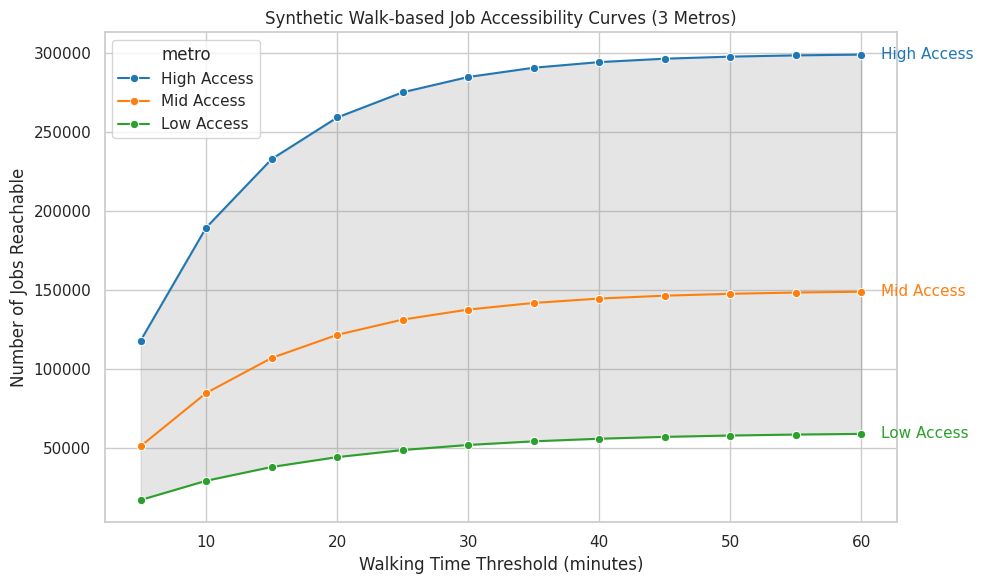

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Synthetic thresholds
thresholds = np.arange(5, 65, 5)  # 5, 10, ..., 60

# Simulate accessibility curves (jobs reachable) for 3 metros
np.random.seed(0)
def make_curve(scale, steepness):
    return scale * (1 - np.exp(-thresholds / steepness))

df = pd.DataFrame({
    "threshold": np.tile(thresholds, 3),
    "jobs": np.concatenate([
        make_curve(scale=300000, steepness=10),  # high-access
        make_curve(scale=150000, steepness=12),  # mid-access
        make_curve(scale=60000, steepness=15)    # low-access
    ]),
    "metro": ["High Access"] * len(thresholds) +
             ["Mid Access"] * len(thresholds) +
             ["Low Access"] * len(thresholds)
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot main lines
palette = {"High Access": "#1f77b4", "Mid Access": "#ff7f0e", "Low Access": "#2ca02c"}
sns.lineplot(data=df, x="threshold", y="jobs", hue="metro", marker="o", palette=palette)

# Shade region between low and high access as synthetic percentile envelope
lower_bound = df[df["metro"] == "Low Access"]["jobs"].values
upper_bound = df[df["metro"] == "High Access"]["jobs"].values
plt.fill_between(thresholds, lower_bound, upper_bound, color="gray", alpha=0.2, label="Range (Low–High)")

# Inline labels at the last threshold
for metro, color in palette.items():
    metro_df = df[df["metro"] == metro]
    x = metro_df["threshold"].values[-1]
    y = metro_df["jobs"].values[-1]
    plt.text(x + 1.5, y, metro, color=color, fontsize=11, va='center')

plt.xlabel("Walking Time Threshold (minutes)")
plt.ylabel("Number of Jobs Reachable")
plt.title("Synthetic Walk‑based Job Accessibility Curves (3 Metros)")
plt.tight_layout()
plt.show()


##What happened

### 1. Setup and Synthetic Data Generation


```python
thresholds = np.arange(5, 65, 5)  # 5, 10, ..., 60
```

**What happens:**
Creates a NumPy array of walking time thresholds (in minutes), ranging from 5 to 60 minutes in 5-minute increments. These serve as the x-axis values for the accessibility curves.



```python
def make_curve(scale, steepness):
    return scale * (1 - np.exp(-thresholds / steepness))
```

**What happens:**
Defines a parametric function to simulate job accessibility as a function of time.
This exponential form models diminishing returns: accessibility grows quickly at first, then levels off.

* `scale` sets the maximum number of jobs reachable
* `steepness` controls how fast the curve approaches that maximum



```python
df = pd.DataFrame({
    "threshold": np.tile(thresholds, 3),
    "jobs": np.concatenate([
        make_curve(scale=300_000, steepness=10),
        make_curve(scale=150_000, steepness=12),
        make_curve(scale=60_000, steepness=15)
    ]),
    "metro": ["High Access"] * len(thresholds) +
             ["Mid Access"] * len(thresholds) +
             ["Low Access"] * len(thresholds)
})
```

**What happens:**
Constructs a DataFrame with three simulated accessibility curves:

* Each row corresponds to a specific walking threshold (5–60 min)
* Each curve represents a city type: high, mid, and low access
* The `jobs` column holds the number of jobs reachable at each time point
* The `metro` column distinguishes the groups

This results in 36 rows (12 thresholds × 3 metros).



### 2. Plotting Accessibility Curves

```python
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
```

**What happens:**
Applies a white grid background for clean visuals and sets a larger figure size for legibility.



```python
palette = {"High Access": "#1f77b4", "Mid Access": "#ff7f0e", "Low Access": "#2ca02c"}
sns.lineplot(data=df, x="threshold", y="jobs", hue="metro", marker="o", palette=palette)
```

**What happens:**
Creates a line plot with three accessibility curves. Each line:

* Uses a specific color defined by `palette`
* Is marked with circles at each threshold point
* Differentiates metro types by hue (legend and color)

The curve shape reveals how job accessibility accumulates over increasing walking time.



### 3. Shading the Range Between Curves

```python
lower_bound = df[df["metro"] == "Low Access"]["jobs"].values
upper_bound = df[df["metro"] == "High Access"]["jobs"].values
plt.fill_between(thresholds, lower_bound, upper_bound, color="gray", alpha=0.2, label="Range (Low–High)")
```

**What happens:**
Fills the area between the lowest and highest access curves with a translucent gray band.
This emphasizes the range or disparity in accessibility between cities.
In real data, you could replace this with interquartile ranges or confidence intervals.



### 4. Inline Labels on the Curve Ends

```python
for metro, color in palette.items():
    metro_df = df[df["metro"] == metro]
    x = metro_df["threshold"].values[-1]
    y = metro_df["jobs"].values[-1]
    plt.text(x + 1.5, y, metro, color=color, fontsize=11, va='center')
```

**What happens:**
For each metro group:

* Finds the last data point (corresponding to 60-minute threshold)
* Places a text label just to the right of the last marker
* Matches the label color to the line color for clear association

This eliminates the need for external annotations or legends.



### 5. Labels and Display

```python
plt.xlabel("Walking Time Threshold (minutes)")
plt.ylabel("Number of Jobs Reachable")
plt.title("Synthetic Walk‑based Job Accessibility Curves (3 Metros)")
plt.tight_layout()
plt.show()
```

**What happens:**

* Adds x- and y-axis labels to indicate units and meaning
* Sets a descriptive title for the plot
* Uses `tight_layout()` to avoid label clipping
* Renders the final visualization


